In [1]:
import matplotlib
import pandas as pd


import numpy as np
from matplotlib import pyplot as plt

base_cleo = '3_test_mirador_'
base_mir = '4_test_mirador_'
test_set = [20,40,80,160,320]

df = pd.read_csv('df_stats.csv')
df_users = pd.read_csv('df_users.csv')

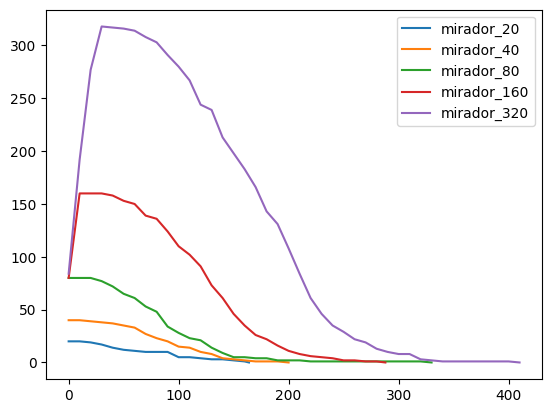

In [2]:
plt.figure()

for test in test_set:
    df_plot = df_users.loc[df_users['users']==test]
    plt.plot(df_plot['time'], df_plot['connected'], label='mirador_'+str(test))
plt.legend()
plt.show()

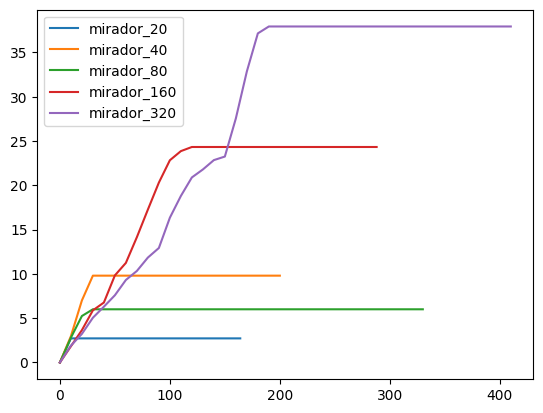

In [7]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_init_load_page')]
    plt.plot(df_plot['time'], df_plot['meanfb']/1000, label='mirador_'+str(test))
plt.legend()
plt.show()

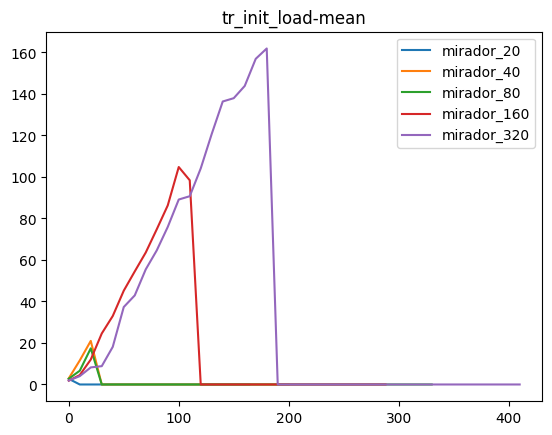

In [6]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_init_load_page')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_init_load-mean')
plt.show()

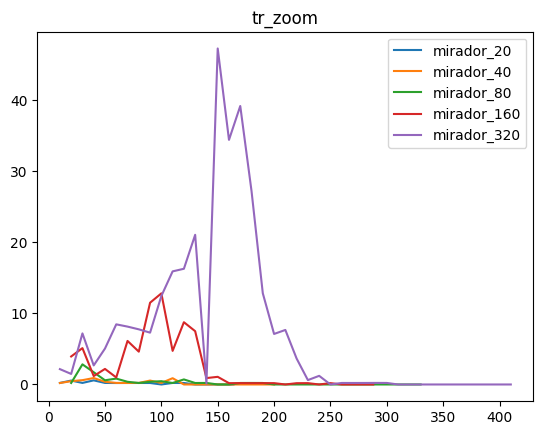

In [8]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_zoom')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_zoom')
plt.show()

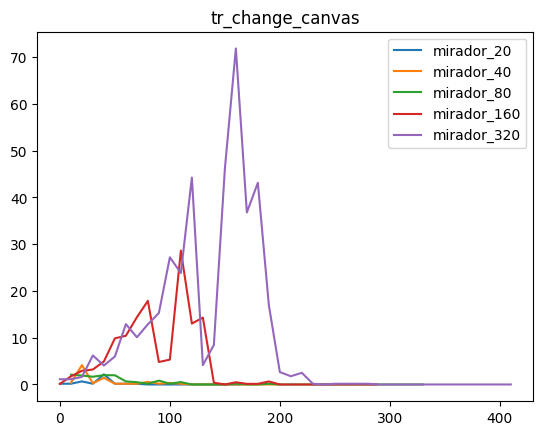

In [9]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='tr_change_canvas')]
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('tr_change_canvas')
plt.show()

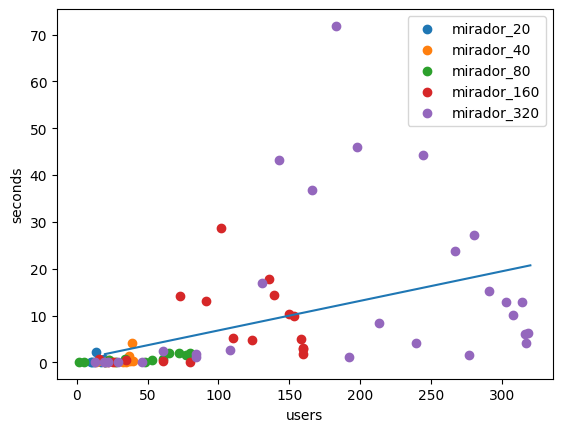

In [36]:
all_x = []
all_y = []
for test in test_set:
    df_data = df.loc[(df['users']==test) & (df['parameter']=='tr_change_canvas')]
    df_usr = df_users.loc[df_users['users']==test]   
    result = pd.merge(df_data[['users','time','mean']], df_usr, on=['users','time']) 
    result = result.loc[result['mean']!=0]
    all_x = np.concatenate((all_x, result['connected']), axis=None)
    all_y = np.concatenate((all_y, result['mean']/1000), axis=None)
    plt.scatter(result['connected'], result['mean']/1000, label='mirador_'+str(test))
    plt.xlabel('connected_users')
    plt.ylabel('seconds')
from sklearn.linear_model import LinearRegression
all_x = np.array(all_x).reshape((-1, 1))
reg = LinearRegression().fit(all_x, all_y)
x_pred = np.array(test_set).reshape((-1, 1))
plt.plot(test_set, reg.predict(x_pred))
plt.legend()

plt.show()


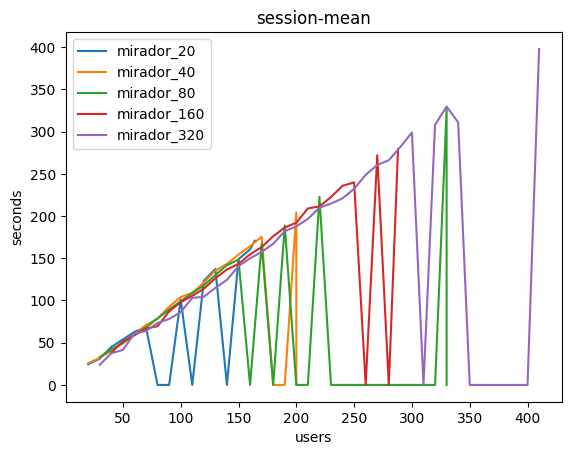

In [49]:
plt.figure()

for test in test_set:
    df_plot = df.loc[(df['users']==test) & (df['parameter']=='session')]
    
    plt.plot(df_plot['time'], df_plot['mean']/1000, label='mirador_'+str(test))
plt.legend()
plt.title('session-mean')
plt.xlabel('time')
plt.ylabel('seconds')
plt.show()

In [ ]:
plt.figure()
cats = np.array(test_set).astype(str)
for parameter in ['tr_init_load_page', 'tr_change_canvas','tr_zoom']:
    df_plot = df.loc[(df['parameter']==parameter)]
    
    plt.bar(cats, df_plot['mean']/1000, label='mirador_'+str(test))
    
plt.legend()
plt.title('session-mean')
plt.xlabel('users')
plt.ylabel('seconds')
plt.show()